
## Ocean Acidification Lab
### Ocean Acidification and Shellfish
Ocean acidification is primarily driven by the dissolution of carbon dioxide into seawater. Approximately 26% of all carbon dioxide released into the atmosphere by human-related activity has been abosorbed by the ocean (ref: La Quere et al. 2012 https://essd.copernicus.org/articles/5/165/2013/). More specifically, the oceans absorbed 2.5 billion gigatons of excess carbon dioxide PER YEAR in the years 2002-2012 (presumably it would be even more in 2012-2022). Some of the excess carbon is exported to the deep ocean and travels with the deep ocean currents that make up the global oveturning circulation (aka thermal-haline circulation, aka the ocean conveyor belt). Based on the circulation pattern, the deep water in the north Pacific will have the most carbon exported to it, and will therefore be the most acidic. When deep water upwells along the coasts of Oregon and Washington State, it acidifies the surface water. This can have devastating effects on specific organisms, i.e. those that try to build shells out of calcium carbonate.

Watch this video about one family in Washington that has been farming shellfish for generations (oysters and geoducks) to learn more about how ocean acidifation affects shellfish seed (babies):

https://www.youtube.com/watch?v=QRmWXKbKQYw

### About the data
In this lab, you will analyze data from another shellfish hatchery, The Whiskey Creek Hatchery in Netarts Bay, Oregon.

![hatchery map](https://github.com/maggimars/OysterOA/raw/main/HatcheryMap.jpg)

The Whiskey Creek Hatchery grows oyster larvae that are used by oyster farmers all throughout the Pacific Northwest. The hatchery workers have noticed that sometimes the oyster larvae do not grow well and they suspected that ocean acidification may be the reason for their problems. In the summer of 2009, each day they started growing a new batch of oyster larvae, the hatchery workers collected data about the water chemistry. The data is publicly available and was published by Barton et al. 2012 in the journal Limnology and Oceanography (https://aslopubs.onlinelibrary.wiley.com/doi/abs/10.4319/lo.2012.57.3.0698).

In this lab, you will plot different aspects of this dataset to investigate how the physics and chemistry of the ocean influence the ability of shellfish to produce new shell material.

### Checking the relationship between pH and shellfish larval growth

Import the packages we will need to analyse the data:

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns
import datetime as dt
import io
import requests

Import the first dataset. This dataset is relatively small. It includes the relative larval production during the summer of 2009. It also includes chemical data for the seawater on each day that larval production is measured. 

In [ ]:
url = "https://raw.githubusercontent.com/maggimars/OysterOA/main/Oyster_Data.csv"
s = requests.get(url).content
df = pd.read_csv(io.StringIO(s.decode('utf-8'))) # this line assigns our data to 
#the variable name "df" stands for "dataframe" and is commonly used to
#name datasets in tutorials and learning settings

#take a look at the data:
df

,Date,Relative_larval_production,Temperature,Salinity,pH,Ca,CO,aragonite_Ksp
0,6/11/09,0.00,16.05,28.78,7.916,8.470,100.179,5.376000e-07
1,6/15/09,-0.33,12.95,32.67,7.888,9.614,91.824,6.237000e-07
2,6/19/09,-0.50,14.48,31.63,7.797,9.308,84.451,5.991000e-07
3,6/30/09,-0.67,11.70,33.13,7.713,9.750,65.340,6.355000e-07
4,7/3/09,-1.00,11.42,33.39,7.794,9.826,74.665,6.415000e-07
5,7/4/09,-0.50,11.89,33.21,7.856,9.773,84.840,6.369000e-07
6,7/5/09,-0.17,12.52,33.05,7.827,9.726,99.080,6.326000e-07
7,7/6/09,0.00,13.64,32.92,8.016,9.688,113.838,6.280000e-07
8,7/8/09,0.33,16.05,31.36,8.005,9.229,105.344,5.905000e-07
9,7/13/09,-0.17,15.38,31.57,7.958,9.291,88.831,5.962000e-07


To look at the relationship between pH and larval production, we can plot the pH on the x-axis and the larval production on the y-axis. Using the Seaborn package (which we imported as `sns`), we can create a pretty decent looking plot with only one line of code. This seaborn plot is a `regplot`, which is short for regression plot. That means the plot will include a regression line (dark blue) that helps us see the relationship between the two variables. The regression line is surrounded by a light blue shaded area that represents the uncertainty in the relationship.

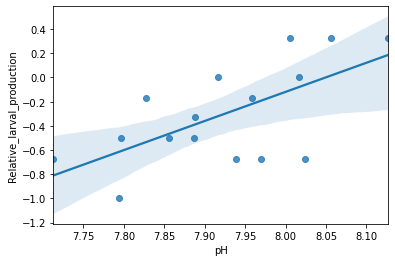

In [131]:
sns.regplot(x = 'pH', y = 'Relative_larval_production', data = df)

Here, the regression line is sloping up to the right and there is a thin uncertainty (shaded blue area) around the line. This indicates that there is a positive relationship between larval production and pH. That is, as pH goes up so does larval production. On the flip side, ad pH goes down (becomes more scidic), larval production decreased. **Importantly, it looks like relative larval production is only positive when pH is at least 8 or higher.**

Therefore, it appears that the hatchery workers were correct when they hypothesized that ocean acidifcation is negatively affecting their shellfish seed (baby oysters). 

### Understanding factors affecting ocean pH 

#### Daily cycles

OK, so we are onboard that ocean acidification is affecting baby shellfish growth. But what exactly is causing fluctuations in ocean pH in the Pacific North West? 

In this part of the lab, you will analyze seawater measurements made every 15 minutes outside Whiskey Creek Hatchery in Netarts Bay, Oregon during the summer of 2009 and use this information to analyze what factors are causing short-term changes in pH.

First, import this new dataset:

In [104]:
url = "https://raw.githubusercontent.com/maggimars/OysterOA/main/oyster_finetime.csv"
s = requests.get(url).content
tf = pd.read_csv(io.StringIO(s.decode('utf-8'))) # assigns the new data set to the variable "tf" - I chose this variable name to stand for "time-series frame"

In [105]:
# for the first dataset we printed out all the data to get a sense of what was there
# We do not want to do that for this dataset, though, because it is very big 
# (remember, a measurement was taken every 15 minutes for an entire summer)

#How big is it?
len(tf) #"len" stands for length and will tell us how long the dataset is (i.e. how many rows are there)

5438

In [106]:
#OK, 5,438 rows. We definitely do not want to print that, but we still do want to take a look at the data. 

# the function "head" will show us just the top or head of the dataset
tf.head()

,Date,Time,Temp,Salinity,pH,Saturation State,Upwelling Index
0,5/31/09,0:00,10.44,32.89,7.829,1.352,16.983
1,5/31/09,0:15,10.43,32.89,7.819,1.325,16.691
2,5/31/09,0:30,10.43,32.89,7.810,1.299,16.400
3,5/31/09,0:45,10.44,32.89,7.805,1.286,16.108
4,5/31/09,1:00,10.45,32.89,7.795,1.260,15.816


In [107]:
#before we start plotting the data, we will want to combine the Date and Time columns
tf['date_time'] = pd.to_datetime(tf['Date'] + " " + tf['Time'])

First, we will make a graph showing how pH varies over time. We can do this with a single line of code using seaborn. This time, we will make a `lineplot`, which with connect all the data points in the time series. 

(array([733559., 733566., 733573., 733580., 733589., 733596., 733603.,
        733610.]), <a list of 8 Text major ticklabel objects>)

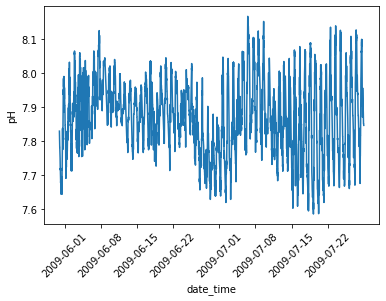

In [ ]:
sns.lineplot(x = 'date_time', y = 'pH', data = tf)
plt.xticks(rotation = 45) #this line turns the dates on the x-axis to make them easier to read

There is a lot of variability here. To better understand this variability, we will plot the data for just one week. To do that, we can select all rows with data collected from July 23 2009 until July 29th. 

In [112]:
tf_slice = tf[(tf['date_time'] >= '2009-7-22') & (tf['date_time'] <= '2009-7-29')] 
# this creates a new data frame that is a one-week "slice" of the original time-series frame
len(tf_slice)

672

(array([733610., 733611., 733612., 733613., 733614., 733615., 733616.,
        733617.]), <a list of 8 Text major ticklabel objects>)

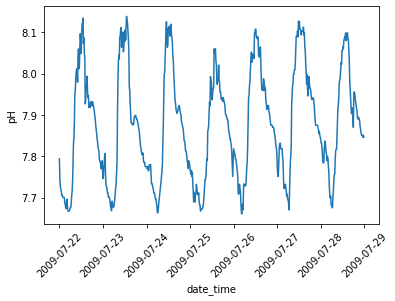

In [111]:
sns.lineplot(x ='date_time', y = 'pH', data = tf_slice)
plt.xticks(rotation = 45)

**Q 2.1:** How many periodic cycles of pH do you see over this one-week time span?

**Q 2.2:** At approximately what time of day does pH generally reach its maximum values? At approximately what time of day does it generally reach its minimum values? 

Hint: taking a smaller slice will help you see the time of the minimum and maximum pH ...


(array([733610.125, 733610.25 , 733610.375, 733610.5  , 733610.625,
        733610.75 , 733610.875, 733611.   , 733611.125, 733611.25 ,
        733611.375]), <a list of 11 Text major ticklabel objects>)

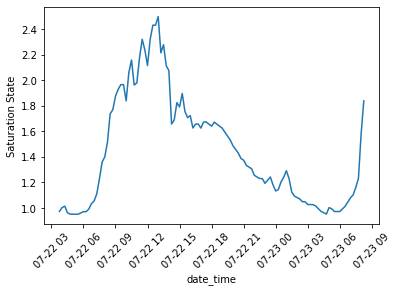

In [113]:
sns.lineplot(x ='date_time', y = 'Saturation State', data = tf_slice[15:130])
# the [14:130] above takes a slice of the sliced dataframe from row 15 to row 130
# this slice represents approximately one day
plt.xticks(rotation = 45)

**Q 2.3:** Explain how photosynthesis and respiration can change the amount of CO2 dissolved in seawater. Which process adds CO2 to the water and which removes it? 

**Q 2.4:** Based on your answer to the previous question, explain how photosynthesis and respiration create the daily cycles in pH that you observe in the data from Netarts Bay.

**Q 2.5:** Based on the data, what would be the best time of day for the oyster hatchery to pump in new water for growing their oyster larvae? Explain why. 

### Upwelling

In addition to these daily cycles in pH, the main process that causes variations in pH on longer times scales is upwelling  of deep ocean water.  



Plot the upwelling index from the summer of 2009 (note: when the upwelling index is larger, there is more deep water upwelling along the coast):

In [130]:
## Its your tune to write some code!!!
## Make a line plot like we did above.
## This time, 'date_time' should be on the x-axis, 'Upwelling Index' should be 
## on the y-axis, and we will be using the whole time-series data set (not the 
## sliced version) so data should be tf. 

## write your code below this line: 


**Q 3.1:** Based on your plot of the upwelling index, during what dates was the strongest upwelling event occuring? 

To get a better understanding of what is happening during an upwelling event, we will plot temperature and salinity for the summer of 2009 and compare these plots to the plot of the upwelling index.

First plot temperature over the course of the whole summer:

(array([733559., 733566., 733573., 733580., 733589., 733596., 733603.,
        733610.]), <a list of 8 Text major ticklabel objects>)

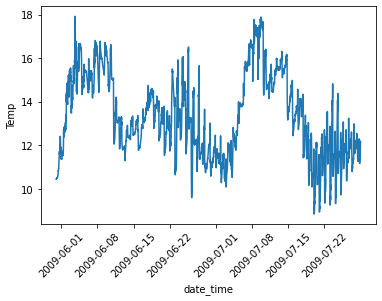

In [116]:
sns.lineplot(x ='date_time', y = 'Temp', data = tf)
plt.xticks(rotation = 45)

Next, plot salinity over the course of the summer:

In [129]:
## Its your tune to write some more code!!!
## Make another line plot like we did above.
## This time, 'date_time' should be on the x-axis, 'Salinity' should be 
## on the y-axis, and we will be using the whole time-series data set (not the 
## sliced version) so data should be tf. 

## write your code below this line: 



**Q 3.2:** How do salinity and temperature change during the upwelling event that you identified in the previous question? Explain  why these changes occur.

To see whether there are changes in pH due to upwelling in these data, we will graph the 1-day mean of pH over the entire summer.  


**Q 3.3:** What is the confounding daily signal we want to separate out by taking the 1-day mean of pH?


In [ ]:
tfm = tf.groupby([tf['date_time'].dt.date]).mean() # this line takes the mean of 
# all the variables for each day and assigns them to a variable tfm (for time-series frame means)

In [ ]:
tfm.head() # take a look at the top lines of new data frame 

,Temp,Salinity,pH,Saturation State,Upwelling Index
date_time,,,,,
2009-05-31,11.138125,32.655833,7.794323,1.289823,9.749948
2009-06-01,12.336771,31.812292,7.840635,1.402667,8.500115
2009-06-02,14.629677,31.221290,7.874172,1.511495,7.600538
2009-06-03,15.177292,30.384896,7.891135,1.558594,3.194146
2009-06-04,15.921354,28.698646,7.912510,1.624615,-9.759281


(array([733559., 733566., 733573., 733580., 733589., 733596., 733603.,
        733610.]), <a list of 8 Text major ticklabel objects>)

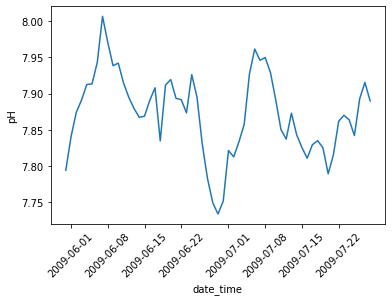

In [ ]:
#plot the daily means in pH:
sns.lineplot(x ='date_time', y = 'pH', data = tfm)
plt.xticks(rotation = 45)

**Q 3.4:** What trend do you observe in pH during the upwelling event?

**Q 3.5:** Based on these data, what recommendations would you give to the oyster hatchery for how to use NOAA’s Upwelling Index forecast in deciding when to pump in new water for growing their oyster larvae? Explain your reasoning.




### In the future...

Now that you have analyzed what is happening at the oyster hatchery today, it is time to think about how the  hatchery will be affected by future changes in ocean chemistry.

The IPCC predicts ocean pH will decrease 0.1 pH units (low emission scenario) to 0.3 pH units (high emission scenario) by the year 2100. 

How will this global change in pH affect the range of pH experienced by Oyster larvae (if we assume that the pH will change at the global rate in the Pacific North West)? 

Start by finding the current pH range that the oysters are experiencing:

In [123]:
min_pH = tf['pH'].min() # calculates the minimum pH and assigns it to the variable 'min_pH'
min_pH # print the minimum pH

7.585

In [124]:
max_pH = tf['pH'].max() # calculates the maximum pH and assigns it to the variable 'max_pH'
max_pH

8.167

Next, subtract the IPCC projected changes for the low emission scenario: 

In [126]:
min_pH - 0.1

7.485

In [127]:
max_pH - 0.1

8.067

In the low emissions scenario, the pH range experienced by the baby shellfish would shift from 7.585-8.167 currently to 7.485-8.067 in the year 2100. 

In the high-emission scenario .... ? 

In [ ]:
##Your turn to code!!
## subtract the high emmision scenario pH change (0.3) from the min_pH to get 
## the new minimum pH:


In [ ]:
##Your turn to code!!
## subtract the high emmision scenario pH change (0.3) from the max_pH to get 
## the new maximum pH


**Q 4.1:** What pH range will the baby shellfish experience in 2100 under the high emission scenario?

**Q 4.2 :** How do you expect these future changes in ocean chemistry will affect the oyster hatchery? 

**Hint:** Look back at the first plot we made where we compared pH to relative larval production. How will larval production change with the predicted changes in pH? 

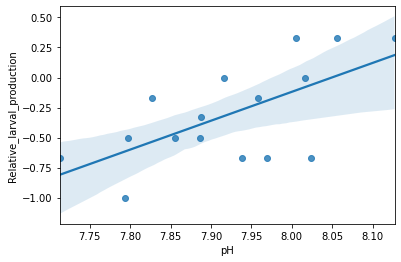

In [128]:
sns.regplot(x ='pH', y ='Relative_larval_production', data=df)

![oyster](https://www.foodsafetynews.com/files/2018/09/Malpeque-oyster.jpg)